
# Project: Wrangle & Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gathering">Gathering data</a></li>
<li><a href="#Assessing">Assessing</a></li> 
<li><a href="#Clean">Clean</a></li>
<li><a href="#Storing">Storing</a></li>    
<li><a href="#Analyzing">Analyzing and Visualizing</a></li> 
</ul>

## Introduction

in this project, we are going to gather data about the account in twitter named We Rate Dogs  after that we will  assess and clean the data to discover what this account is hiding facts for us, let us  enjoy 

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests 
import os
import tweepy 
import json
import time
import re
import seaborn as sns

<a id='Gathering'></a>
## Gathering data

**1- CSV**

In [2]:
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


**2 - TSV file**

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)        
with open (os.path.join('image-predictions.tsv') , mode = 'wb') as file:
    file.write(response.content)

In [5]:
image = pd.read_csv('image-predictions.tsv', sep= '\t')

In [6]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3 -** read tweet's entire set of JSON data in a file called tweet_json.txt file

In [7]:
tweet_id = []
favorites = []
retweets = [] 

with open ('tweet-json.txt', mode = 'r') as file: 
    for line in file.readlines():
        tweet_data = json.loads(line)
        tweet_id.append(tweet_data['id'])
        favorites.append(tweet_data['favorite_count'])
        retweets.append(tweet_data['retweet_count'])

tweet_data = pd.DataFrame({'tweet_id':tweet_id,'favorites_count':favorites,'retweets_count':retweets})        

In [8]:
tweet_data.head()

,tweet_id,favorites_count,retweets_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


<a id='Assessing'></a>
## Assessing 

In [9]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Quality**
- retweeted_status_timestamp, timestamp should be datetime instead of object
- we are not gonna use these columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id) so,we will drop this columns  

**Tidiness**
- Dog type variable in four columns: doggo, floofer, pupper, puppo

In [10]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- the denominator have 0 values this not acceptable even the numerator. 

In [11]:
twitter_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
787,774639387460112384,NaN,NaN,2016-09-10 16:03:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sprinkles. He's trapped in light jail....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/774639387...,10,10,Sprinkles,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
532,808001312164028416,NaN,NaN,2016-12-11 17:31:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He likes to stick his tongue o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808001312...,12,10,Cooper,None,None,None,None
578,800751577355128832,NaN,NaN,2016-11-21 17:23:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mauve and Murphy. They're rather ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800751577...,12,10,Mauve,None,None,None,None
2152,669680153564442624,NaN,NaN,2015-11-26 00:52:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shawwn. He's a Turkish Gangrene Robitu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669680153...,8,10,Shawwn,None,None,None,None
2065,671151324042559489,NaN,NaN,2015-11-30 02:18:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*struggling to breathe properly* 12/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671151324...,12,10,None,None,None,None,None
711,784517518371221505,NaN,NaN,2016-10-07 22:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He has yet to learn how to co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784517518...,11,10,Frankie,None,None,None,None
216,850753642995093505,NaN,NaN,2017-04-08 16:54:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Kyle. He made a joke about your shoes,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/850753642...,11,10,Kyle,None,None,None,None
1084,738402415918125056,NaN,NaN,2016-06-02 16:10:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Don't talk to me or my son ever again"" ...10/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738402415...,10,10,None,None,None,None,None


- name column have unusual names
- source column unreadable 

In [12]:
twitter_arch['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
twitter_arch['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
twitter_arch['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Ester         1
Dot           1
Clybe         1
Diogi         1
Griswold      1
Name: name, Length: 957, dtype: int64

In [15]:
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


- delete jpg_url we are not gona use url in analysis 

In [16]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- Missing values in images its 2075 rows instead of 2356 as in twitter_arch
- tweet_id should be string

In [17]:
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
tweet_data

,tweet_id,favorites_count,retweets_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [19]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   favorites_count  2354 non-null   int64
 2   retweets_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [20]:
tweet_data.describe()

,tweet_id,favorites_count,retweets_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


<a id='Assess'></a>
### Assess Summary 

### Quality

##### `twitter_arch`

- We are not gonna use these columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id) so,we will drop this columns  
- Retweeted_status_timestamp, timestamp should be datetime instead of object
- The numerator and denominator have unacceptable values.
- name column have unusual names 
- Source column unreadable
- delete expanded_urls we are not going use url in analysis
       

##### `image`
- Missing values in images its 2075 rows instead of 2356 as in twitter_arch
- tweet_id should be string 

### Tidiness
- Dog type variable in four columns: doggo, floofer, pupper, puppo
- merge to dataframes (image),(twitter_arch) and (tweet_data)

In [21]:
twitter_arch_c = twitter_arch.copy()
tweet_data_c = tweet_data.copy()
image_c = image.copy()

<a id='Clean'></a>
## Clean

**Define**

merge to dataframes (image),(twitter_arch) and (tweet_data)

**Code**

In [22]:
twitter_clean = pd.merge(left=twitter_arch_c,
                                 right=tweet_data_c, left_on='tweet_id', right_on='tweet_id', how='inner')

In [23]:
twitter_clean = twitter_clean.merge(image_c, on='tweet_id', how='inner')

**Test**

In [24]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

**Define**

name column have unusual names 

**Code**

In [25]:
twitter_clean['name'] = twitter_clean['name'].str.replace('^[a-z]+', 'None')

**Test**

In [26]:
twitter_clean['name'].value_counts()


None       677
Charlie     11
Tucker      10
Penny       10
Oliver      10
          ... 
Anakin       1
Ronduh       1
Clarq        1
Maya         1
Rontu        1
Name: name, Length: 914, dtype: int64

**Define**

- we are not gonna use these columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id) so,we will drop this columns  

**Code**

In [27]:
twitter_clean = twitter_clean.drop(['in_reply_to_status_id', 
                                    'in_reply_to_user_id',
                                    'retweeted_status_id',
                                    'retweeted_status_user_id',
                                   'retweeted_status_timestamp',
                                   'expanded_urls'], axis=1)

**Test**

In [28]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2073 non-null   int64  
 1   timestamp           2073 non-null   object 
 2   source              2073 non-null   object 
 3   text                2073 non-null   object 
 4   rating_numerator    2073 non-null   int64  
 5   rating_denominator  2073 non-null   int64  
 6   name                2073 non-null   object 
 7   doggo               2073 non-null   object 
 8   floofer             2073 non-null   object 
 9   pupper              2073 non-null   object 
 10  puppo               2073 non-null   object 
 11  favorites_count     2073 non-null   int64  
 12  retweets_count      2073 non-null   int64  
 13  jpg_url             2073 non-null   object 
 14  img_num             2073 non-null   int64  
 15  p1                  2073 non-null   object 
 16  p1_con

**Define**

- timestamp should be datetime instead of object

**code**

In [29]:
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

**Test**

In [30]:
twitter_arch_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Define**

- the numerator and denominator have unacceptable values.


**Code**

In [31]:
text_rate  = twitter_clean[twitter_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

for n in text_rate:
    x = twitter_clean.text == n
    rating_numerator = 'rating_numerator'
    rating_denominator = 'rating_denominator'
    twitter_clean.loc[x, rating_numerator] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", n)
    twitter_clean.loc[x, rating_denominator] = 10

C:\Users\me-ra\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


**Test**

In [32]:
twitter_clean[twitter_clean.text.isin(text_rate)]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
454,802624713319034886,2016-11-26 21:26:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Yep... just as I suspected. Yo...",11,10,None,None,None,None,...,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
616,777684233540206592,2016-09-19 01:42:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",11,10,None,None,None,None,...,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
825,747600769478692864,2016-06-28 01:21:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,7,10,Bookstore,None,None,None,...,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
876,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",14,10,None,None,None,None,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
967,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,13,10,None,None,None,None,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
1001,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,11,10,Bluebert,None,None,None,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1017,714258258790387713,2016-03-28 01:10:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,8,10,Travis,None,None,None,...,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
1139,703356393781329922,2016-02-26 23:10:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,2,10,Socks,None,None,None,...,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
1229,695064344191721472,2016-02-04 02:00:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,13,10,None,None,None,None,...,1,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False
1234,694352839993344000,2016-02-02 02:53:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,5,10,Oliviér,None,None,None,...,2,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True


**Define**

 find the numerators that have decimal

**Code**

In [33]:
twitter_clean[twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\me-ra\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,5,10,Bella,None,None,None,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
558,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
614,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,None,None,pupper,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1451,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,26,10,None,None,None,None,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [34]:
ratings_decimals_text = []
index=[] 

for i, text in twitter_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        index.append(i)
# Print ratings with decimals        
index , ratings_decimals_text

([40, 558, 614, 1451],
 ['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
  "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
  "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
  'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'])

In [35]:
# Set correct numerators for specific tweets
twitter_clean.loc[(twitter_clean['tweet_id'] == 883482846933004288) & (twitter_clean['rating_numerator'] == 5),  ['rating_numerator']] = 13.5
twitter_clean.loc[(twitter_clean['tweet_id'] == 786709082849828864) & (twitter_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
twitter_clean.loc[(twitter_clean['tweet_id'] == 778027034220126208) & (twitter_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
twitter_clean.loc[(twitter_clean['tweet_id'] == 680494726643068929) & (twitter_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

**Test**

In [36]:
twitter_clean[twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\me-ra\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
40,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,13.5,10,Bella,None,None,None,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
558,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",9.75,10,Logan,None,None,None,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
614,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10,Sophie,None,None,pupper,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1451,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,11.26,10,None,None,None,None,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


**Define**

Dog type variable in four columns: doggo, floofer, pupper, puppo

**Code**

In [37]:
twitter_clean.doggo.value_counts() ,twitter_clean.floofer.value_counts(),twitter_clean.pupper.value_counts() ,twitter_clean.puppo.value_counts()

(None     1993
 doggo      80
 Name: doggo, dtype: int64,
 None       2065
 floofer       8
 Name: floofer, dtype: int64,
 None      1852
 pupper     221
 Name: pupper, dtype: int64,
 None     2049
 puppo      24
 Name: puppo, dtype: int64)

In [38]:
twitter_clean.loc[twitter_clean.doggo == 'None', 'doggo'] = ''
twitter_clean.loc[twitter_clean.floofer == 'None', 'floofer'] = ''
twitter_clean.loc[twitter_clean.pupper == 'None', 'pupper'] = ''
twitter_clean.loc[twitter_clean.puppo == 'None', 'puppo'] = ''
twitter_clean['Dog_Type'] = twitter_clean.doggo + twitter_clean.floofer + twitter_clean.pupper + twitter_clean.puppo

In [39]:
twitter_clean.Dog_Type.value_counts()

                1753
pupper           210
doggo             67
puppo             23
doggopupper       11
floofer            7
doggopuppo         1
doggofloofer       1
Name: Dog_Type, dtype: int64

In [40]:
twitter_clean = twitter_clean.drop(['doggo', 
                                    'floofer',
                                    'pupper',
                                    'puppo'], axis=1)

In [41]:
twitter_clean.Dog_Type.value_counts()

                1753
pupper           210
doggo             67
puppo             23
doggopupper       11
floofer            7
doggopuppo         1
doggofloofer       1
Name: Dog_Type, dtype: int64

**Test**

In [42]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   int64              
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   source              2073 non-null   object             
 3   text                2073 non-null   object             
 4   rating_numerator    2073 non-null   object             
 5   rating_denominator  2073 non-null   int64              
 6   name                2073 non-null   object             
 7   favorites_count     2073 non-null   int64              
 8   retweets_count      2073 non-null   int64              
 9   jpg_url             2073 non-null   object             
 10  img_num             2073 non-null   int64              
 11  p1                  2073 non-null   object             
 12  p1_conf             2073 non-null 

**Define**

Source column unreadable

**code**

In [43]:
twitter_clean['source'] = twitter_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

**Test**

In [44]:
twitter_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorites_count,retweets_count,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Dog_Type
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,


**Define**

Change Datatype of tweet_id and other columns that required to change 

**Code**

In [45]:
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(str)
twitter_clean['Dog_Type'] = twitter_clean['Dog_Type'].astype('category')
twitter_clean['rating_numerator'] = twitter_clean['rating_numerator'].astype(float)
twitter_clean['rating_denominator'] = twitter_clean['rating_denominator'].astype(float)

**Test**

In [46]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   object             
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   source              2073 non-null   object             
 3   text                2073 non-null   object             
 4   rating_numerator    2073 non-null   float64            
 5   rating_denominator  2073 non-null   float64            
 6   name                2073 non-null   object             
 7   favorites_count     2073 non-null   int64              
 8   retweets_count      2073 non-null   int64              
 9   jpg_url             2073 non-null   object             
 10  img_num             2073 non-null   int64              
 11  p1                  2073 non-null   object             
 12  p1_conf             2073 non-null 

<a id='Storing'></a>
### Storing

In [47]:
twitter_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [48]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorites_count,retweets_count,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Dog_Type
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


<a id='Analyzing'></a>
### Analyzing and Visualizing

**Q1: the Favorite and retweet relation  **

<Figure size 7500x7500 with 0 Axes>

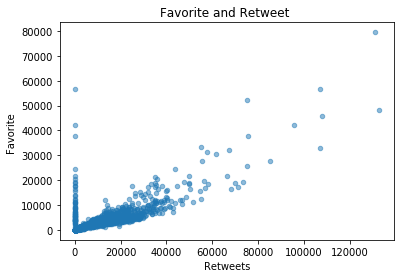

<Figure size 7500x7500 with 0 Axes>

In [75]:
twitter_clean.plot(kind='scatter',x='favorites_count',y='retweets_count', alpha = 0.5)
plt.title('Favorite and Retweet ');
plt.xlabel('Retweets');
plt.ylabel('Favorite ');
plt.figure(figsize=(50,50), dpi = 150)

positive correlation

**Q2:what is The popular 10 dogs by favorites**

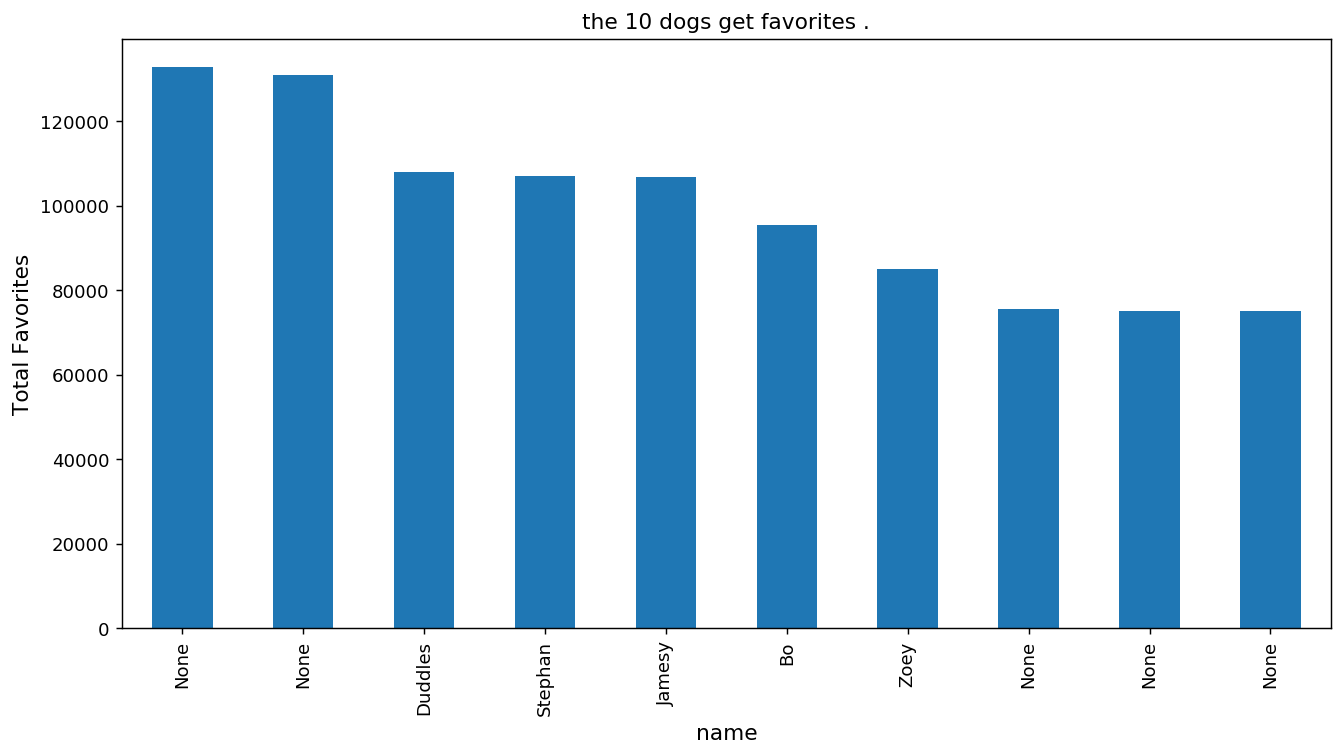

In [51]:
q2 = twitter_clean.copy()

# set the figure size  
plt.figure(figsize=(12,6), dpi = 130)
#set the X label
plt.xlabel('Name', fontsize = 12)
# set the Y label 
plt.ylabel('Total Favorites', fontsize = 12)
#set the titel of te figure 
plt.title('the 10 dogs get favorites .')
q2.set_index(['name'],inplace=True)
fav = q2['favorites_count'].nlargest(10)
fav.plot(y='favorites_count',kind = 'bar');

And this the cute dog with no name get the most of the favorites 

In [52]:
from IPython.display import Image 
Image(url = ' https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg')

**Q3:the dog has the most of People Talk**

In [53]:
q3 = twitter_clean.copy()
q3.set_index(['name', 'jpg_url'],inplace=True)
dog =q3['retweets_count'].nlargest(1)

In [54]:
dog

name  jpg_url                                                                                
None  https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg    79515
Name: retweets_count, dtype: int64

In [55]:
Image(url = ' https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg')